# <center> **Análise Turbina Eólica** </center>

Em turbinas eólicas, os sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada, etc., em intervalos de 10 minutos. Este arquivo foi retirado do sistema scada de uma turbina eólica que está funcionando e gerando energia na Turquia.

<style>
.center {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 70%;
}
</style>

<img src="utils/energia-eolica-aerogerador.jpg" alt="Turbina Eólica" style="width:40%" class="center">


**Bibliotecas para análise de dados**

In [109]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina'

In [110]:
dados_turbina = pd.read_csv("T1.csv")
dados_turbina.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


### Renomeando as colunas

In [111]:
dados_turbina.columns = ["data_hora", "potencia_ativa_kW", "velocidade_vento_m/s",
                         "curva_potencia_teorica_KWh", "direcao_vento_graus"]
dados_turbina.head()

,data_hora,potencia_ativa_kW,velocidade_vento_m/s,curva_potencia_teorica_KWh,direcao_vento_graus
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


Converter a coluna **data_hora** para o tipo ***datetime***, para isso, pode-se usar a função do pandas ***pd.datetime()*** passando como parâmetro a coluna do DataFrame correspondente.

In [112]:
dados_turbina["data_hora"] = pd.to_datetime(dados_turbina["data_hora"])
dados_turbina["data_hora"]

0       2018-01-01 00:00:00
1       2018-01-01 00:10:00
2       2018-01-01 00:20:00
3       2018-01-01 00:30:00
4       2018-01-01 00:40:00
                ...        
50525   2018-12-31 23:10:00
50526   2018-12-31 23:20:00
50527   2018-12-31 23:30:00
50528   2018-12-31 23:40:00
50529   2018-12-31 23:50:00
Name: data_hora, Length: 50530, dtype: datetime64[ns]

## Visualização dos dados

### Curva da Potência Teórica e Potência Ativa Real em Função da Velocidade do Vendo

Todo sistema real se comporta de forma não linear, isso fica evidente no gráfico da **potência Ativa** que mostra diferentes valores de potência para valores proximos de vento, já o gráfico **Curva Potência Teórica** mostra a curva teórica da potência em função do vento.

Com isso, pode-se concluir que sistemas reais tendem a não ser iguais a modelos teóricos, no entanto, pode-se observar que existe uma tendência nos dados reais que se aproximam dos dados teóriocos.

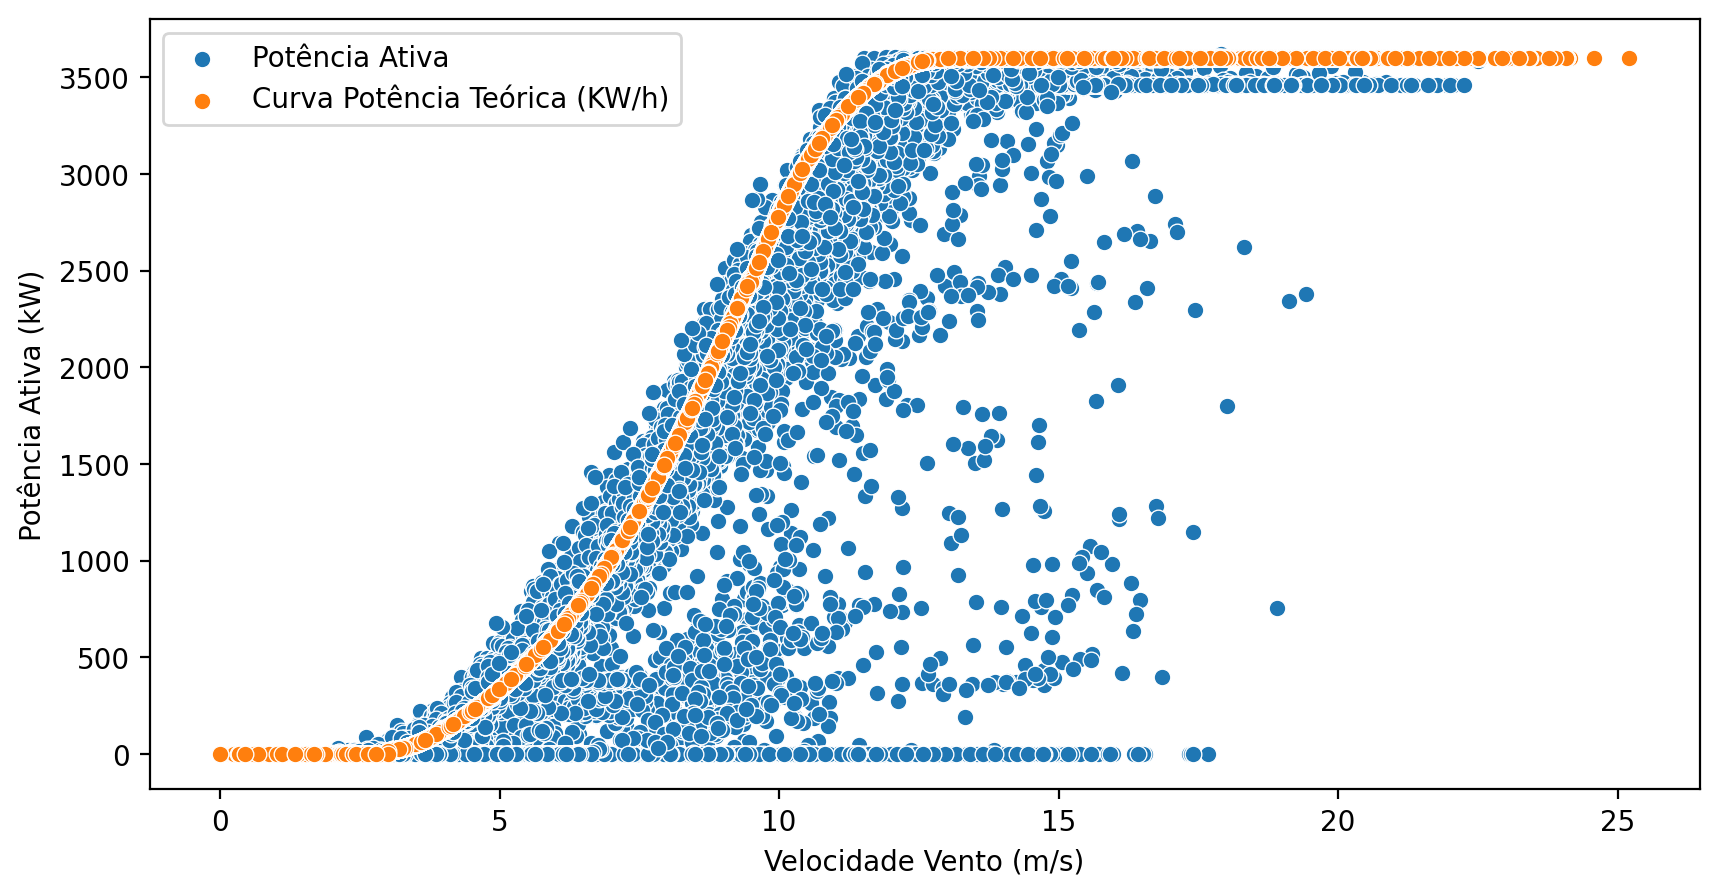

In [113]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=dados_turbina,
                x="velocidade_vento_m/s", y="potencia_ativa_kW", 
                label="Potência Ativa")

sns.scatterplot(data=dados_turbina,
                x="velocidade_vento_m/s", y="curva_potencia_teorica_KWh", 
                label="Curva Potência Teórica (KW/h)")
plt.xlabel("Velocidade Vento (m/s)")
plt.ylabel("Potência Ativa (kW)")
plt.show()

### Curva da Pontência Ativa por Mês do Ano  - 2018

In [114]:
dados_turbina["data_hora"][0].month

1

In [115]:
dados_velo_vento = [[], [], [], [], [], [],
                   [], [], [], [], [], []]
dados_potencia = [[], [], [], [], [], [],
                   [], [], [], [], [], []]
for i, j in enumerate(dados_turbina["data_hora"]):
    for n in range(13):
        if j.month == n+1:
            dados_velo_vento[n].append(dados_turbina["velocidade_vento_m/s"][i])
            dados_potencia[n].append(dados_turbina["curva_potencia_teorica_KWh"][i])


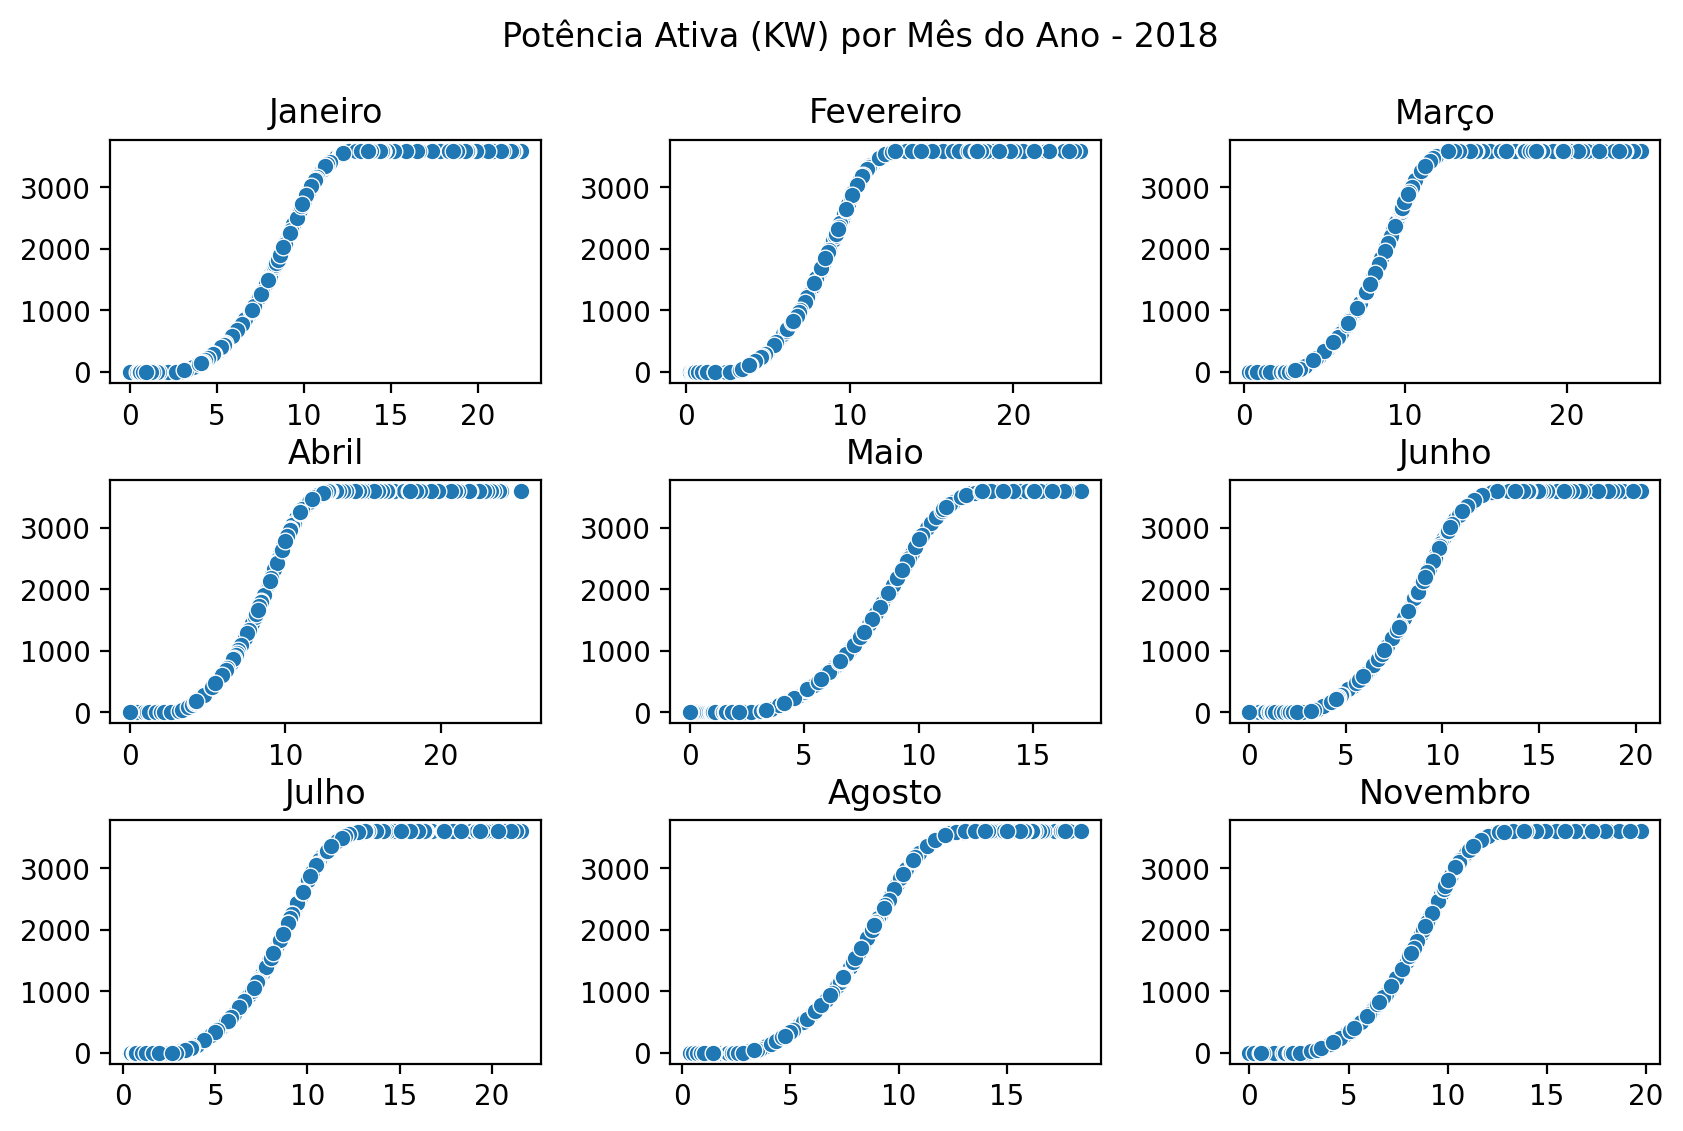

In [120]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
fig.suptitle("Potência Ativa (KW) por Mês do Ano - 2018")

meses = ["Janeiro", "Fevereiro", "Março", "Abril",
         "Maio", "Junho", "Julho", "Agosto", "Novembro", "Dezembro"]

cont = 0
for i in range(3):
    for j in range(3):
        sns.scatterplot(ax=axes[i, j],
                        x=dados_velo_vento[cont],
                        y=dados_potencia[cont])
        axes[i, j].set_title(meses[cont])
        cont += 1
plt.show()
